In [1]:
# Import libraries
import os
import sys

# Import third party libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import functions
sys.path.append('/workspaces/MTMA33_Computing/practical_5/scripts')
from practical_5_functions import *

In [3]:
# Define the path to the data
data_path = "/workspaces/MTMA33_Computing/practical_5/data/ghana_rainfall.txt"

In [4]:
# Assess the risk of a moderate flood
# 5-day precipitation accumulation threshold of 75 mm
# Using the function assess_flood_risk
flood_risk = assess_flood_risk(data_path, threshold=75)
print(flood_risk)

0.07675194660734148


In [5]:
# Assess the risk of a severe flood
# 5-day precipitation accumulation threshold of 100 mm
# Using the function assess_flood_risk
flood_risk = assess_flood_risk(data_path, threshold=100)
print(flood_risk)

0.042269187986651836


In [6]:
# Assess the risk of a devestating flood
# 5-day precipitation accumulation threshold of 140 mm
# Using the function assess_flood_risk
flood_risk = assess_flood_risk(data_path, threshold=140)
print(flood_risk)

0.0011123470522803114


Very small risk of a devestating flood - still non-zero though.

Use a longer time series, 1,000,00 points, to assess the flood risk.

In [7]:
# Using a longer time series, assess the risk of a moderate flood
# 5-day precipitation accumulation threshold of 75 mm
# Using the function assess_flood_risk_long
flood_risk = assess_flood_risk_long(data_path, threshold=75)
print(flood_risk) 

0.116413


In [8]:
# Using a longer time series, assess the risk of a severe flood
# 5-day precipitation accumulation threshold of 100 mm
# Using the function assess_flood_risk_long
flood_risk = assess_flood_risk_long(data_path, threshold=100)
print(flood_risk)

0.035261


In [9]:
# Using a longer time series, assess the risk of a devestating flood
# 5-day precipitation accumulation threshold of 140 mm
# Using the function assess_flood_risk_long
flood_risk = assess_flood_risk_long(data_path, threshold=140)
print(flood_risk)

0.003095


Devestating flood is more than 2x more likely when more datapoints are used.

Using the assess_flood_risk_long function, calculate flood risk for a moderate flood threshold 20 times over, using 20 simulated time series, each randomly generated with 1200 time points, saving the results into an array.

* How much does the risk vary between these 20 estimates?

[0.1        0.05916667 0.13       0.1175     0.11666667 0.1125
 0.09083333 0.10333333 0.12333333 0.13916667 0.12       0.10666667
 0.09083333 0.115      0.12666667 0.09916667 0.12166667 0.135
 0.11083333 0.12916667]


(array([1., 0., 0., 2., 0., 4., 3., 4., 4., 2.]),
 array([0.05916667, 0.06716667, 0.07516667, 0.08316667, 0.09116667,
        0.09916667, 0.10716667, 0.11516667, 0.12316667, 0.13116667,
        0.13916667]),
 <BarContainer object of 10 artists>)

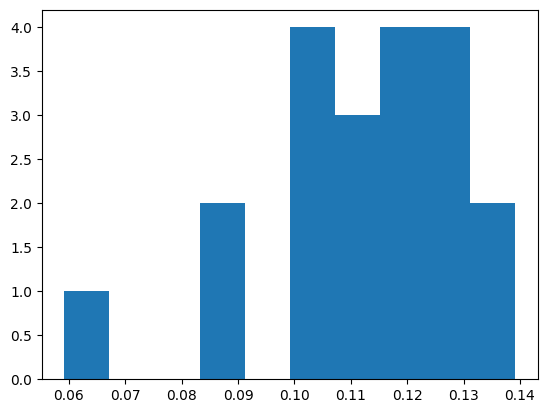

In [17]:
# Set up the no time points
n_points = 1200

# Set up the no. of flood risk values to be generated
n_estimates = 20

# Set up an empty array to store the flood risk values
flood_risk_values = np.zeros(n_estimates)

# Set up a loop to generate the flood risk values
for i in range(n_estimates):
    flood_risk_values[i] = assess_flood_risk_long(data_path, length=n_points, threshold=75)

# Print the flood risk values
print(flood_risk_values)

# Plot the histogram of the flood risk values
plt.hist(flood_risk_values, bins=10)

* How does this risk vary for severe flood risk (threshold 100mm)?

[0.04       0.03333333 0.02416667 0.02333333 0.04916667 0.02833333
 0.03416667 0.02333333 0.0375     0.03666667 0.01833333 0.0225
 0.06666667 0.03333333 0.03416667 0.02416667 0.0375     0.03083333
 0.04       0.0375    ]


(array([2., 4., 2., 8., 2., 0., 1., 0., 0., 1.]),
 array([0.01833333, 0.02316667, 0.028     , 0.03283333, 0.03766667,
        0.0425    , 0.04733333, 0.05216667, 0.057     , 0.06183333,
        0.06666667]),
 <BarContainer object of 10 artists>)

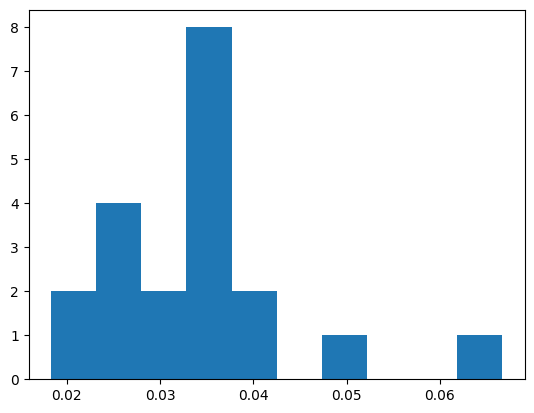

In [18]:
# Set up an empty array to store the flood risk values
flood_risk_values = np.zeros(n_estimates)

# Set up a loop to generate the flood risk values
for i in range(n_estimates):
    flood_risk_values[i] = assess_flood_risk_long(data_path, length=n_points, threshold=100)

# Print the flood risk values
print(flood_risk_values)

# Plot the histogram of the flood risk values
plt.hist(flood_risk_values, bins=10)

Make a plot of threshold vs. flood risk for thresholds ranging from 75mm to 150mm, at intervals of 10mm.

Repeat the process by creating 20 simulated time series for each threshold and present all of the results as point on the same plot to investigate the effects of stochastic variability.

/tmp/ipykernel_17423/2766606764.py:34: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(thresholds, np.mean(flood_risk_values_list, axis=1), yerr=error_bars, fmt='o', marker='^', capsize=5)
/tmp/ipykernel_17423/2766606764.py:36: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(thresholds, flood_risk_values_list, 'o', marker='o', color='black', alpha=0.3)


Text(0, 0.5, 'Flood risk')

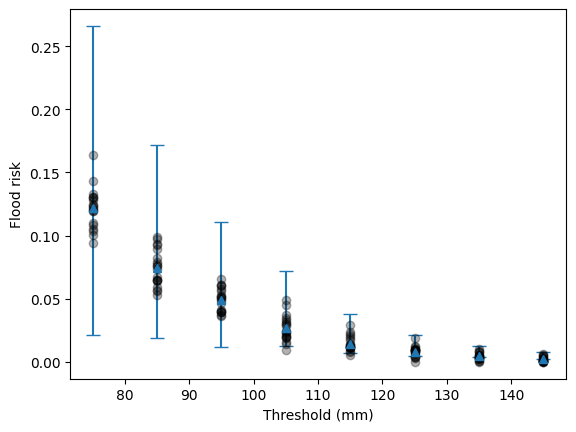

In [28]:
# Initialize an empty list to store the flood risk values
flood_risk_values_list = []

# Set up the no estimates for each threshold
n_estimates = 20

# Set up the range of flood risk thresholds
# from 75mm to 150mm in steps of 10mm
thresholds = np.arange(75, 155, 10)

# Set up a loop to generate the flood risk values
for threshold in thresholds:
    # Initialize an empty array to store the flood risk values
    flood_risk_values = np.zeros(n_estimates)
    # Set up a loop to generate the flood risk values
    for i in range(n_estimates):
        flood_risk_values[i] = assess_flood_risk_long(data_path, length=n_points, threshold=threshold)

    # Append the flood risk values to the list
    flood_risk_values_list.append(flood_risk_values)

# print(flood_risk_values_list)

# Calculate the error bars
# based on the 5th and 95th percentiles intervals
error_bars = np.zeros((2, len(thresholds)))

# Set up a loop to calculate the error bars
for i in range(len(thresholds)):
    error_bars[0, i] = np.percentile(flood_risk_values_list[i], 5)
    error_bars[1, i] = np.percentile(flood_risk_values_list[i], 95)

# Plot the flood risk values and the error bars
plt.errorbar(thresholds, np.mean(flood_risk_values_list, axis=1), yerr=error_bars, fmt='o', marker='^', capsize=5)
# Also plot the flood risk values
plt.plot(thresholds, flood_risk_values_list, 'o', marker='o', color='black', alpha=0.3)
plt.xlabel('Threshold (mm)')
plt.ylabel('Flood risk')

* Flood risk decreases almost exponentially with increasing threshold

* Standard deviation (by 5% to 95% c.i.) also decreases rapidly with increasing threshold
    * Is this due to there being fewer records of the more extreme events?